# Import Libraries

In [1]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ultralytics 8.0.228 requires py-cpuinfo, which is not installed.
ultralytics 8.0.228 requires pyyaml>=5.3.1, which is not installed.
ultralytics 8.0.228 requires requests>=2.23.0, which is not installed.
ultralytics 8.0.228 requires torch>=1.8.0, which is not installed.
ultralytics 8.0.228 requires torchvision>=0.9.0, which is not installed.
ultralytics 8.0.228 requires tqdm>=4.64.0, which is not installed.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [3]:
df=pd.read_csv('data/Countries.csv')

In [4]:
df.sample(n=11)

,name,Longitude,Latitude
107,Jamaica,-77.314826,18.156949
161,Netherlands,5.281448,52.100790
122,Lebanon,35.880161,33.923066
75,Gabon,11.788629,-0.586600
69,Finland,26.274666,64.498846
79,Ghana,-1.216766,7.953456
168,Panama,-80.119152,8.517508
149,Mauritania,-10.347798,20.257367
105,Israel,35.004447,31.461101
134,Morocco,-8.456158,29.837630


# Plot Data

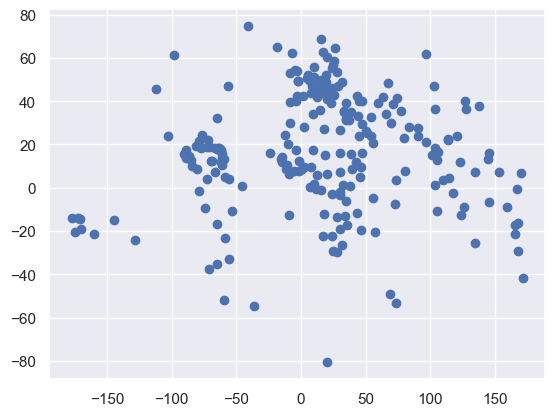

In [4]:
plt.scatter(df['Longitude'],df['Latitude'])
plt.show()

# Select Features

In [5]:
x = df.loc[:,['Longitude','Latitude']]
x.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


# Cluster

### Assuming 2

In [6]:
km = KMeans(n_clusters=7)

In [7]:
km.fit(x)

KMeans(n_clusters=7)

# Predict

In [8]:
clusters = km.predict(x)

In [9]:
df_cluster = df.copy()
df_cluster['Cluster'] = clusters

In [10]:
df_cluster.head()

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,5
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,4


# Visualize

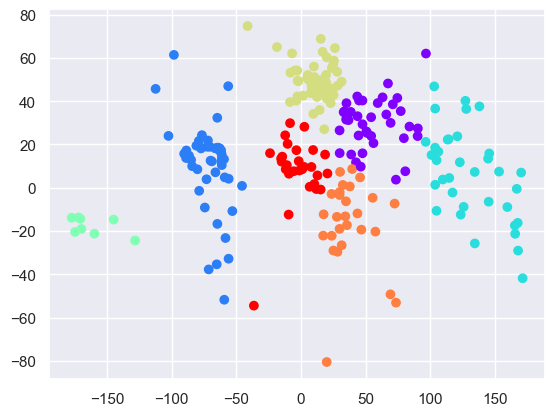

In [11]:
plt.scatter(df['Longitude'],df['Latitude'],c=df_cluster['Cluster'],cmap='rainbow')
plt.show()

# Elbow Method to get proper number of clusters

In [12]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


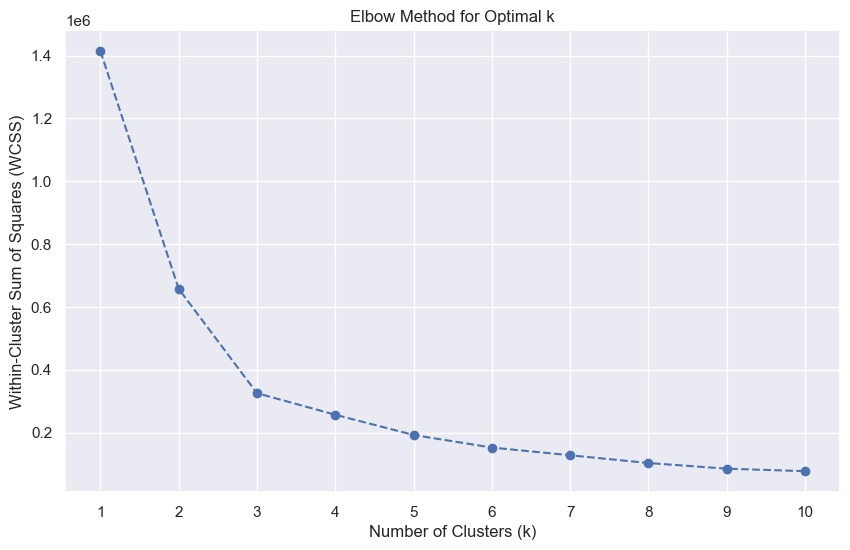

In [13]:
# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(np.arange(1, 11, 1))  # Set ticks for x-axis
plt.grid(True)
plt.show()

# Silhoutte

In [14]:
from sklearn.metrics import silhouette_score

In [15]:

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(x, labels))


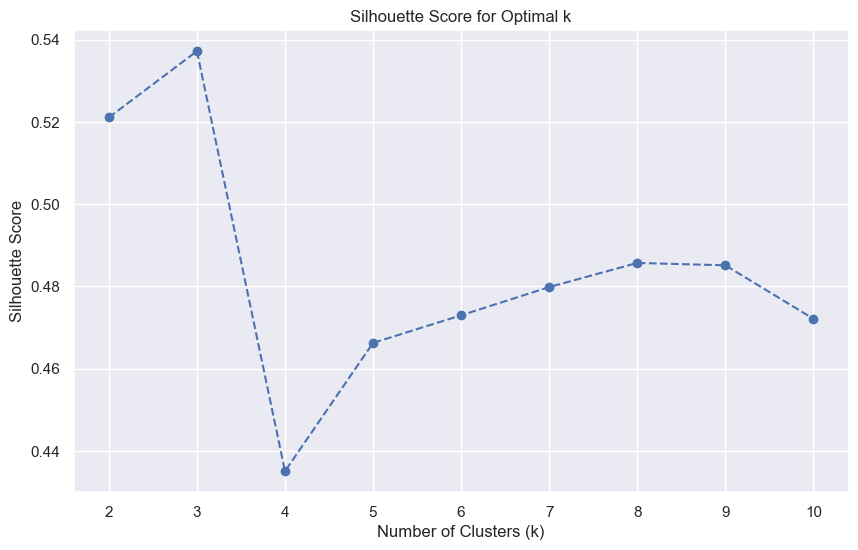

In [16]:
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(np.arange(2, 11, 1))  # Set ticks for x-axis
plt.grid(True)
plt.show()

# Final cluster is 3

In [17]:
km = KMeans(n_clusters=3)
km.fit(x)
clusters = km.predict(x)


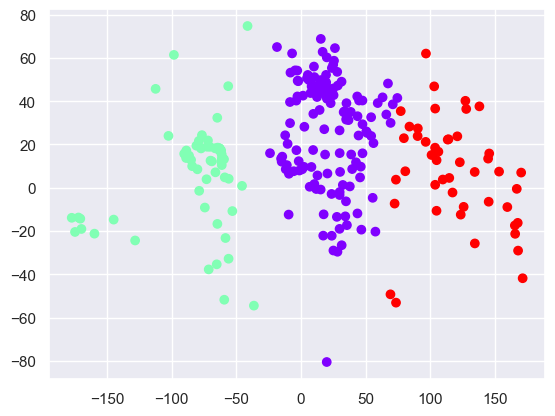

In [18]:
df_cluster = df.copy()
df_cluster['Cluster'] = clusters
plt.scatter(df['Longitude'],df['Latitude'],c=df_cluster['Cluster'],cmap='rainbow')
plt.show()